# Linear Model for Classification

In regression, we saw that the target to be predicted was a continuous variable. In classification, it is discrete.

We will go back to our penguin dataset. However, this time we will try to predict the penguin species using the culmen information. We will consider only 2 penguin species to solve a binary classification problem.

In [26]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [26]:
penguins = pd.read_csv('data/penguins_classification.csv')

# We only keep the Adelie and Chinstrap classes
penguins = penguins.set_index("Species").loc[
    ['Adelie', 'Chinstrap']].reset_index()
culmen_columns = ['Culmen Length (mm)', 'Culmen Depth (mm)']
target_column = "Species"

In [31]:
penguins.sample(5)

,Species,Culmen Length (mm),Culmen Depth (mm)
162,Chinstrap,51.7,20.3
127,Adelie,39.0,17.1
4,Adelie,39.3,20.6
114,Adelie,42.7,18.3
49,Adelie,39.6,17.7


We can quickly start by visualizing the feature distribution by class:

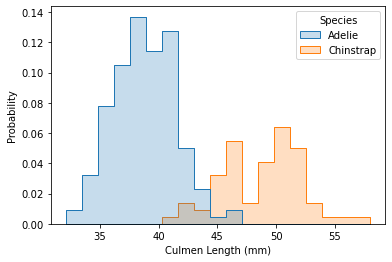

In [30]:
sns.histplot(data=penguins, x='Culmen Length (mm)', bins=19,
             element='step', hue='Species', stat='probability');

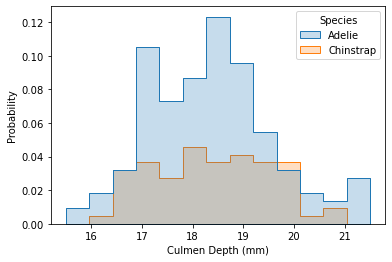

In [28]:
sns.histplot(data=penguins, x='Culmen Depth (mm)', bins=13,
         element='step', hue='Species', stat='probability');

For model fitting, we will separate the target from the data and we will create a training and a testing test:

In [33]:
penguins_train, penguins_test = train_test_split(penguins, random_state=0)

data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

In [34]:
range_features = {
    feature_name: (penguins[feature_name].min() - 1,
                   penguins[feature_name].max() + 1)
    for feature_name in culmen_columns
}

In [ ]:
def plot_decision_function(fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    from sklearn.preprocessing import LabelEncoder

    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step),
    )

    # compute the associated prediction
    Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="RdBu_r")

    return ax